In [1]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import joblib

In [2]:
# Run data cleaning process
%run clean_data.ipynb

,review,sentiment
0,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent...",negative
1,I am actually horrified this place is still in business. My 3 year old son needed a haircut this...,negative
2,I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and hou...,positive
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop;\n\nMumbly, unengaged waiter;\n\nClueless mana...",negative
4,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive ...",positive
5,"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I ...",positive
6,"Really good place with simple decor, amazing food and great hospitality.\nVery impressed with th...",positive
7,"Awesome office and staff, very professional and friendly. I saw Adam Garling PA-C and his assist...",positive
8,Most delicious authentic Italian I've had in the US. You wouldn't leave this place unhappy. The ...,positive
9,I have been here twice. Very nice and laid back. I tried the weekend Southern menu and it was de...,positive


(20000, 2)

In [3]:
# Separate data and labels
X = df['review']
y = df['sentiment']

# Using a hashing vectorizer to keep model size low
cv = HashingVectorizer(stop_words='english', ngram_range=(1,2))
cv.fit(X)
X_fitted = cv.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_fitted, y, test_size=0.25, random_state=42)

# Linear SVM powered by SGD Classifier (params are defaults)
clf = SGDClassifier(loss='hinge', tol=None, max_iter=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.94      0.92      2490
    positive       0.94      0.90      0.92      2510

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



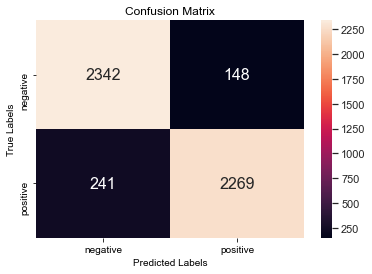

In [4]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# Plot (powered by seaborn)
ax = plt.subplot()
sn.set(font_scale=1)
sn.heatmap(df_cm, ax=ax, annot=True, annot_kws={'size': 16}, fmt='g')

# Labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['negative', 'positive'])
ax.yaxis.set_ticklabels(['negative', 'positive'])
plt.show()

In [5]:
# Pickling to save models
joblib.dump(cv, '../static/models/input_transformer.pkl')
joblib.dump(clf, '../static/models/review_sentiment.pkl')



['../static/models/review_sentiment.pkl']